# Text Emotions Classification
Text Emotions Classification is a project aimed at identifying and assigning specific emotions to text data.

The goal is to classify text into predefined categories of emotions (like happiness, sadness, anger, etc.), which can be incredibly useful for applications in social media monitoring, customer feedback analysis, and mental health support.

Text emotions classification is the problem of natural language processing and text classification. Here we need to train a text classification model to classify the emotion of a text.

To solve this problem, we need labelled data of texts and their emotions. I found an ideal dataset to solve this problem on Kaggle.

# Importing Libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI ML With Python Complete/22-Deep Learning/Text Classification/train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [7]:
texts = data["Text"].tolist()
texts

['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirsty',
 'i have immense sympath

In [8]:
label = data["Emotions"].tolist()
label

['sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 'joy',
 'joy'

In [9]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [10]:
sequences = tokenizer.texts_to_sequences(texts)
sequences

[[1,
  39,
  100,
  59,
  7,
  14,
  493,
  4,
  14,
  3495,
  552,
  31,
  59,
  60,
  127,
  147,
  75,
  1479,
  3,
  21,
  1254],
 [16, 3059, 6, 1148, 4, 285, 1, 2, 494, 437],
 [1, 23, 164, 7, 664, 26, 5, 4157, 1, 58, 46, 8, 12, 21, 71, 29, 5, 3496],
 [1, 23, 7, 1064],
 [72, 47, 7, 6, 55, 520, 318, 327, 157, 160, 8, 19],
 [72,
  47,
  328,
  34,
  7400,
  34,
  195,
  7401,
  887,
  3,
  72,
  2474,
  1383,
  6,
  158,
  1884,
  18,
  1,
  116,
  2,
  13,
  14,
  454],
 [1, 2, 28, 438, 26, 77, 28, 6, 1685, 34, 28, 759, 28, 6, 192, 266, 373],
 [1,
  20,
  47,
  24,
  5259,
  15,
  214,
  1,
  2,
  8,
  5259,
  98,
  5260,
  134,
  3,
  131,
  6,
  1037,
  4158],
 [1, 2, 665, 93],
 [1, 2, 13, 1, 20, 4, 79, 5, 732, 1, 92, 543, 303, 83],
 [1,
  38,
  2,
  8,
  482,
  21,
  6,
  529,
  439,
  3,
  8,
  1,
  39,
  919,
  4,
  20,
  68,
  839,
  9,
  1885,
  3060],
 [1, 69, 12, 89, 5, 5261, 51, 9, 192, 4, 2, 609],
 [1, 2, 338, 455, 1, 92, 31, 4159],
 [1,
  20,
  4160,
  1686,
  24,
  5,
 

In [11]:
max_length = max([len(seq) for seq in sequences])
max_length

66

In [12]:
padded_sequences = pad_sequences(sequences, maxlen=max_length) # need to pad the sequences to the same length to feed them into a neural network.
padded_sequences

array([[   0,    0,    0, ...,    3,   21, 1254],
       [   0,    0,    0, ...,    2,  494,  437],
       [   0,    0,    0, ...,   29,    5, 3496],
       ...,
       [   0,    0,    0, ...,    3,  101, 1331],
       [   0,    0,    0, ...,  339,    8,   42],
       [   0,    0,    0, ...,   25, 3585,   12]], dtype=int32)

In [13]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(label)
labels

array([4, 0, 3, ..., 2, 0, 4])

In [14]:
# One-hot encode the labels
one_hot_labels = keras.utils.to_categorical(labels)  # One hot encoding refers to the transformation of categorical labels into a binary representation where each label is represented as a vector of all zeros except a single 1. This is necessary because machine learning algorithms work with numerical data.
one_hot_labels

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [15]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences,one_hot_labels,test_size=0.2)

In [16]:
# Define the model
model = Sequential()
model

<Sequential name=sequential, built=False>

In [17]:
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
history= model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3914 - loss: 1.5130 - val_accuracy: 0.7144 - val_loss: 0.8512
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.4063 - val_accuracy: 0.8072 - val_loss: 0.6082
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0580 - val_accuracy: 0.8119 - val_loss: 0.6502
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9940 - loss: 0.0262 - val_accuracy: 0.8047 - val_loss: 0.6949
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9969 - loss: 0.0157 - val_accuracy: 0.8000 - val_loss: 0.6766
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0136 - val_accuracy: 0.7969 - val_loss: 0.7744
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0093 - val_accuracy: 0.7950 - val_loss: 0.7953
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0100 - val_accuracy: 0.

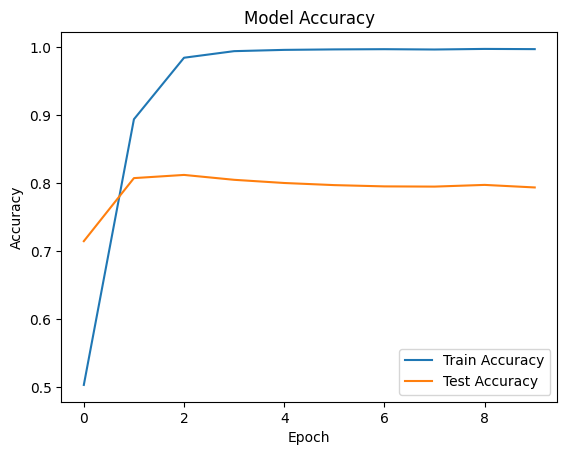

In [20]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
input_text = input("Enter a text: ")

Enter a text: i am feeling pretty homesick this weekend


In [22]:
# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


array([[4.2522315e-05, 2.8427914e-05, 4.9556471e-05, 1.6752301e-08,
        9.9987566e-01, 3.8122191e-06]], dtype=float32)

In [23]:
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print("Predicted Emotion: ",predicted_label.tolist())

Predicted Emotion:  ['sadness']


In [24]:
from sklearn.metrics import classification_report
# Evaluate the model
y_pred = np.argmax(model.predict(xtest), axis=-1)
y_true = np.argmax(ytest, axis=-1)
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

       anger       0.81      0.71      0.76       444
        fear       0.77      0.67      0.71       398
         joy       0.79      0.90      0.84      1060
        love       0.78      0.52      0.62       244
     sadness       0.81      0.87      0.84       939
    surprise       0.70      0.55      0.61       115

    accuracy                           0.79      3200
   macro avg       0.78      0.70      0.73      3200
weighted avg       0.79      0.79      0.79      3200



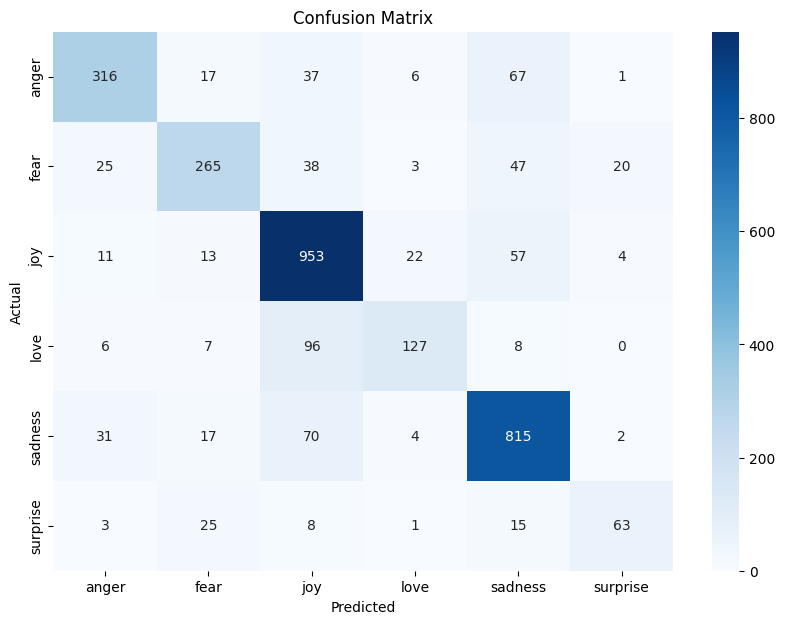

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

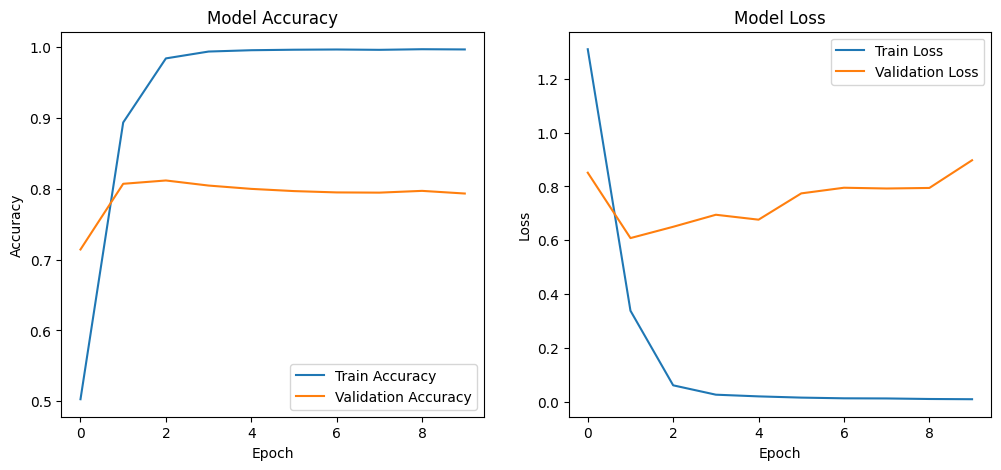

In [27]:
plot_training_history(history)